# Assignment 3: LDA Topic Modeling

## Note
Installing Tomotopy locally can return an error, if that's the case run this notebook on Google Colab

## Research Background

LDA is a popular topic modeling algorithm widely used in the fields of Digital Humanities and Social Sciences. In the field of political communication, topic modeling is often applied for analyzing politicians Twitter/X posts, identitying thematic patterns or topics revolving around their posts.

For this assignment, students will work with tweets from two USA politicians, Donald Trump and Bernie Sanders, who are often regarded as right-wing populist and left-wing populist respectively. Right-wing populism often emphasizes nationalism, anti-immigration policies, and a critique of global elites from a culturally conservative perspective, focusing on preserving traditional values and social hierarchies. Left-wing populism prioritizes economic inequality, advocating for the redistribution of wealth, expansion of social services, and empowerment of the working class against the capitalist elite. While both forms of populism appeal to the "common people" against perceived elites and established structures, they diverge significantly in their identification of the elites, proposed solutions, and core ideologies. For a more detailed explanation, you can read the chapter by Macaulay (2019) "Bernie and The Donald: A comparison of left-and right-wing populist discourse" (full reference below).

**Research Questions**
1. What topics are revolving around Donald Trump and Bernie Sanders' posts separately?
2. What are the topic differences between Trump (right-wing popoulist) and Sanders (left-wing populist)?

**Aim:**
1. The first aim of the assignment is to conduct LDA topic modeling. Identify thematic patterns or politics revolving around Trump or Sanders's posts.
2. The second aim is to critically evaluate the results of topic modeling. Try different numbers of topics to see with which settings the topics are more coherent. Critically reflect on the results of LDA topic modeling, discussing them in relation to existing theories about populism.

**Data**
Two datasets are prepared for this assginment. Tweets from Trump and tweets from Sanders. Students are asked to work on these two datasets.

**Methods**
1. Word segamentation
2. Removing stopwords
3. LDA topic modeling
4. Topic evaulation (coherence and human evaluation)
5. Visualization of results.

**References**
1. Macaulay, M. (2019). Bernie and the Donald: A comparison of Left-and Right-wing populist discourse. *Populist discourse: International perspectives*, 165-195.





## Setup

### Q1. Install necessary libraries, including `tomotopy` and `little_mallet_wrapper`, and import them

In [68]:
# Q1 (code)
!pip install tomotopy
!pip install little_mallet_wrapper
!pip install nltk
!pip install matplotlib

In [69]:
import tomotopy as tp
import little_mallet_wrapper
import nltk
import matplotlib.pyplot as plt
import pandas as pd
import seaborn
import glob
from pathlib import Path

## Data preprocessing

### Q2. Load the two datasets and concatenate them

The goal is to run topic modelling on the combined dataset of Sanders and Trump's tweets

In [70]:
# Q2 (code)
sanders_tweets_path = 'C:/Users/josie/Downloads/sanders_tweets.csv'
trump_tweets_path = 'C:/Users/josie/Downloads/trump_tweets.csv'
sanders_tweets = pd.read_csv(sanders_tweets_path)
trump_tweets = pd.read_csv(trump_tweets_path)
sanders_and_trump_tweets = pd.concat([sanders_tweets, trump_tweets], ignore_index=True)
sanders_and_trump_tweets_df = pd.DataFrame(sanders_and_trump_tweets)

### Q3. Clean the data

Transform all tweets to lowercase, remove stopwords, punctuation, and numbers. Add the processed text to a list called `training_data`.
Create a list with the content of the tweets (`original_texts`) and a list that allows you to identify both the author of the tweet and its ID (`titles`).


In [86]:
# Q3 (code)
training_data = []
original_texts = []
titles = []
import re

for index, row in sanders_and_trump_tweets_df.iterrows():
    content = row['Content']
    content_text = re.sub(r"http\S+|www\S+|https\S+|\/\/t|co\/|\@\w+|realdonaldtrump", '', content, flags=re.MULTILINE) # Remove both punctuation and irrelevant tags
    processed_text = little_mallet_wrapper.process_string(content_text, numbers='remove')
    training_data.append(processed_text) # Append with clean tweets (next line as well)
    original_texts.append(content_text)
    titles.append(row['Title']) # Rename
    titles.append(f"Tweet Author: {row['Username']}, Tweet ID: {row['TweetId']}") # Format cleanly

In [72]:
len(training_data), len(original_texts), len(titles)

(30371, 30371, 60742)

## LDA topic modelling

### Q4. Train a an LDA topic model with `tomotopy`

In [73]:
# Q4 (code)
# Number of topics to return
num_topics = 15
# Number of topic words to print out
num_topic_words = 10

# Intialize the model
model = tp.LDAModel(k=num_topics)

# Add each document to the model, after splitting it up into words
for text in training_data:
    model.add_doc(text.strip().split())

print("Topic Model Training...\n\n")

# Iterate over the data 10 times
iterations = 10
for i in range(0, 100, iterations):
    model.train(iterations)
    print(f'Iteration: {i}\tLog-likelihood: {model.ll_per_word}')

Topic Model Training...


Iteration: 0	Log-likelihood: -9.258924399228297
Iteration: 10	Log-likelihood: -8.840158947431654
Iteration: 20	Log-likelihood: -8.673694636227996
Iteration: 30	Log-likelihood: -8.589499699480408
Iteration: 40	Log-likelihood: -8.534393605675987
Iteration: 50	Log-likelihood: -8.494984884988924
Iteration: 60	Log-likelihood: -8.459187795459213
Iteration: 70	Log-likelihood: -8.432228425844807
Iteration: 80	Log-likelihood: -8.413245535066332
Iteration: 90	Log-likelihood: -8.392740690829553


### Q5. Print out the top words for each topic and manually evaluate their coherence


In [84]:
# Q5a (code)
# Print out top 10 words for each topic
print("\nTopic Model Results:\n\n")

topics = [] # Initialize to store string of topics
topic_individual_words = [] # Initialize to store list of words related to each topic
for topic_number in range(0, num_topics): # Loop through topics
    topic_words = ' '.join(word for word, prob in model.get_topic_words(topic_id=topic_number, top_n=num_topic_words))
    topics.append(topic_words)
    topic_individual_words.append(topic_words.split())
    print(f"✨Topic {topic_number}✨\n\n{topic_words}\n") # Print the topic number and the associated words related to the topic


Topic Model Results:


✨Topic 0✨

great thank american america today people day country nation law

✨Topic 1✨

states united change world climate war energy iran must trump

✨Topic 2✨

great thank big vote state win maga america get night

✨Topic 3✨

house senate trump president white today must congress republicans bill

✨Topic 4✨

president great trump live today thank join meeting honor minister

✨Topic 5✨

trump democrats election impeachment fbi president russia collusion witch hunt

✨Topic 6✨

tax trump security social cuts cut billion class taxes want

✨Topic 7✨

state puerto hurricane rico federal help local government national new

✨Topic 8✨

china trade big drug deal states countries many much united

✨Topic 9✨

border great strong military crime total endorsement democrats wall complete

✨Topic 10✨

health care workers people must million americans need right millions

✨Topic 11✨

economy jobs since years history ever record president year trump

✨Topic 12✨

people must cou

### Note: I did this assignment in a few different sessions. When returning I had to run all cells again. I ran the theme one again and it came up with different wordlists and themes after I had already written the cell below following the first iteration. Since it took me a long time to do this, I kept my descriptions. I believe I included every single word in quotations in the explanations so that will show you what my original themes/wordlists were. I followed the updated topic list for all other questions beyond these explanations.

### Q5b (words)
#### Describe what each topic is about. What ideas, values, or situations do these keywords refer to?

Topic 0 seems to be about past, future, or current presidents themselves ("president", "trump", "biden", "joe", "obama"), perhaps alluding to their tenure(s) as president(s) for whatever reason with "years". It also may allude to their performance with words like "never" indicating some actions that the president(s) have taken or didn't take that may be controversial. "Perhaps" may indicate some speculation about the course of action that the presidents do or do not take.

Topic 1 seems to concern foreign affairs, relations, and trade ("china", "trade", "deal") with the ("united", "states") obviously serving as the central figure to these relations. "Good" may indicate that these deals and relations are seen as positive.

Topic 2 could be about healthcare as these are two of the keywords there, maybe indicating that there is a discussion around healthcare as a right ("right", "need") of "americans" (another keyword, also "american"). The outlier in this topic is "republicans" as "democrats" is obviously missing - this may mean that the intentions of republicans is represented or discussed more within the healthcare topic, or that republicans themselves tend to have these conversations more often.

Topic 3 is a bit more nuanced. "Strong" and "military" may indicate that the central theme is the U.S. Military. "Job" could mean jobs within the U.S. military although it is not clear. "State", "vote", and "amendment" may indicate that there is legislation regarding the military that is being discussed on a state-level. "Great" being grouped with military-focused words may mean that there is a positive discussion of the U.S. military being had.

Topic 4 contains the following words: "jobs", "workers", "economy", "tax", "american" and "americans". This pretty strongly indicates that there is a theme around the employment of Americans. "Year" and "years" being inluded is somewhat vague, as well as "since" and "drug".

Topic 5 is very clearly about the news: "media", "news", "story". "Bad" and "fake" indicate a negative viewpoint of the news media. "election" can indicate that this negative viewpoint is directed towards the media's handling of an election. "Even", "people", "many", and "never" are also vague but could indicate that people's reactions to the media is being discussed.

Topic 6 is about Trump either as newly elected president or formerly ("trump", "president") - most likely newly elected due to the presence of "new". Perhaps it is about a speech or inauguration at the White House ("white", "house") being covered or streamed on TV or online ("live", "watch", "news"). "Great" indicates that the theme is positive towards this result/speech/event/person.

Topic 7's theme is likely U.S. border security/control and immigration ("border", "wall", "security"). "Democrats", "party", and "left" indicates that either democrats are primarily discussing the topic or that their stance is being criticized, emphasized by the presence of "biden", a democratic president. "Law" and "country" can indicate a focus on legislation regarding the border and how this legislation may help/hurt the U.S. "Want" can indicate the support or non-support of the solutions to the topic being discussed.

Topic 8: The theme here is likely about tax laws ("tax") surrounding both the working class ("working", "class", "workers", "people") and upper class and businesses ("billionaires", "corporations"). "Trump" indicates that this president's position or action surrounding tax legislation is being discussed, maybe that he is being urged in a particular direction ("need"). 

Topic 9: This topic is also quite vague, mostly surrounding nationalistic pride ("great", "thank", "nation", "american", "america"), maybe on a national holiday or significant date ("today", "honor", "day"). The outlier here is "women" which may indicate the holiday celebrates or concerns women in some way. The inclusion of "president" remains somewhat vague, although it is not far from the other U.S.-focused words.

Topic 10: The theme seems to concern climate change ("climate", "change", "energy", "fossil"). "Must", "together", "america", "american", and "people" may indicate a persuasive intent behind this language, urging to action on the matter. Again, "trump" is present, which may mean that his actions/intentions/stance on the issue are being discussed.

Topic 11: The theme here is likely about the Meuller Investigation in which Robert Meuller of the FBI investigated Russia's supposed interference with the 2016 U.S. presidential election and ties to President Trump ("fbi", "collusion", "russia", "mueller", "trump"). Trump often called the investigation a witch hunt which are both words represented here. "hillary" and "clinton" are present as Hillary Clinton was a direct target of Russian interference and therefore was relevant to the topic. 

Topic 12: This theme revolves around the democratic call for impeachment of President Trump as this is the only figure targeted for "impeachment", although it is interesting his name is not mentioned. Democrats were highly involved in the process ("democrats", "dems", "schiff", "pelosi"), although "republicans" is also present, suggesting both sides weighed in heavily on the issue. An impeachment would require input from the "house" and "senate". "Nothing" is an outlier but may indicate a sense of defending the president from impeachment, or that not enough is being done to achieve this impeachment.

Topic 13 is seemingly thematically focused on Trump's celebration of a victory of some kind, most likely in a presidential election. "Maga" (Trump's campaign slogan) indicates this, along with "win" - "state" and "florida" indicates that it is a victory on a state-level in Florida. "great" and "thank" are positive words that indicate his gratefulness over the victory.

Topic 14 - in this topic but it seems that the theme is centered around "war" and freedom "free", perhaps urging ("must") American people to support peacebuilding efforts ("wage" war or conflict to achieve peace ("end"), "united" and "world" indicating a sense of global unity.

## Topic coherence

Use `tomotopy`'s [`.coherence()`](https://bab2min.github.io/tomotopy/v0.10.0/en/coherence.html) function to automatically calculate the topic coherence.

The coherence value can vary from `0` (no coherence) to `1` (maximum coherence). Interpret the results and, if needed, retrain the model using a different number of topics.

In [75]:
# There are different metrics for coherence, we choose `c_v`

coh = tp.coherence.Coherence(model, coherence='c_v')
average_coherence = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k) for k in range(model.k)]

print('==== Coherence : {} ===='.format('c_v'))
print('Average:', average_coherence, '\nPer Topic:', coherence_per_topic)
print()

==== Coherence : c_v ====
Average: 0.5642784595799942 
Per Topic: [0.44550585448741914, 0.5685260683298111, 0.5380047798156739, 0.4561397358775139, 0.5187576189637184, 0.6802391111850739, 0.6235622987151146, 0.5584345176815987, 0.5800541013479232, 0.6987576678395271, 0.6655602633953095, 0.5282145828008652, 0.4526953220367432, 0.5590682436712087, 0.5906567275524139]



### Q6. Interpret topic coherence

Report the following:
- number of topics you initially used to train the model and the coherence score you got
- changes made to the number of topics and new coherence scores obtained

#### Q6 (words)
The number of topics were 15 and my average coherence score was 0.5600826043387254. I did not make changes to the number of topics.

### X1. Optional question 1
(This question is not compulsory, it only allows you to get an extra point.)

Create a function to plot the average coherence for models with different number of topics.

In [76]:
# X1 (code)
# Tip: y = average topic coherence; x = number of topics in the model


### Q7. Topic distributions
Calculate the topic distributions for all tweets and get the top documents for some topics (between 2 and 5) that you think could be more representative of Sanders or Trump.

In [77]:
# Q7a (code)

# Calculating topic distributions for all tweets
topic_distributions = [list(doc.get_topic_dist()) for doc in model.docs]
# List the probabilities
topic_distributions[32]

# Displaying the top documents
from IPython.display import Markdown, display

# Format properly
def make_md(string):
    display(Markdown(str(string)))

def get_top_docs(docs, topic_distributions, topic_index, n=5):

    sorted_data = sorted([(_distribution[topic_index], _document)
                          for _distribution, _document
                          in zip(topic_distributions, docs)], reverse=True)

    topic_words = topics[topic_index]

    make_md(f"### ✨Topic {topic_index}✨\n\n{topic_words}\n\n")
    print("---")

    for probability, doc in sorted_data[:n]:
        # Make topic words bolded
        for word in topic_words.split():
            if word in doc.lower():
                doc = re.sub(f"\\b{word}\\b", f"**{word}**", doc, re.IGNORECASE)

        make_md(f'✨  \n**Topic Probability**: {probability}  \n**Document**: {doc}\n\n')

    return

get_top_docs(titles, topic_distributions, topic_index=5, n=5)

### ✨Topic 5✨

trump democrats election impeachment fbi president russia collusion witch hunt



---


✨  
**Topic Probability**: 0.938663899898529  
**Document**: Tweet Author: SenSanders, Tweet ID: 824239387584167936



✨  
**Topic Probability**: 0.9364680051803589  
**Document**: Tweet Author: SenSanders, Tweet ID: 700095086789582848



✨  
**Topic Probability**: 0.9131097197532654  
**Document**: SenSanders_828335794624528384



✨  
**Topic Probability**: 0.9109683036804199  
**Document**: Tweet Author: @realDonaldTrump, Tweet ID: 954878124214415360



✨  
**Topic Probability**: 0.9109683036804199  
**Document**: SenSanders_748285902787584000



Interpret the results above. Are there topics that have top tweets only by one politician? Why do you think these topics are more representative of one of the two politicians' views?

#### Q7b (words)

#### Topic 1: "president impeachment democrats house schiff trump senate call nothing pelosi" 
This topic includes only Trump in the top tweets. This could be because the topic concerns the suggested impeachment of Donald Trump and therefore involves him directly, as well as taking a defensive stance ("nothing").

#### Topic 2, "people trump american president never country like right know one"
This topic is interesting because Sanders has all the top tweets in this category. With the added context, we can infer that this topic is accompanied by criticism by Sanders of Trump's presidency, due to the politicians being on either side of the political spectrum.

#### Topic 3, "great vote total endorsement military strong complete state thank job"
This topic is dominated by Trump with 4, Sanders with 1. This could be because of Trump's emphasis on a strong military versus Sanders' relaxed view of the military.

#### Topic 5, "news fake media new people never story many book like"
This topic is dominated again by Trump with 4 followed by Sanders with 1. This is indicative of Trump's well-known criticism of the integrity of the media.

##### Overall
Many other topics are mixed, especially concerning controversial occurrences as these are typically addressed by all politicians on either side, but in these examples alone we can see the starkly different values of the two politicians.

## Large scale analysis

### Q8. Create a random sample of the whole dataset and visualize the topic distributions for the sampled tweets

In [78]:
# Crete a sample of tweets

from random import sample

target_labels = sample(titles,100)

In [79]:
# Q8 (code)
# Create a heatmap using the random sample
# Tip: to display more than 20 tweets you have to change the values of `dim =` in sns.heatmap()
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set(style='ticks', font_scale=1.2)

def plot_categories_by_topics_heatmap(labels,
                                      topic_distributions,
                                      topic_keys,
                                      target_labels=None,
                                      output_path=None,
                                      color_map='rocket_r',  
                                      dim=(None)):  
    
    # Combine the labels and distributions into a list of dictionaries.
    dicts_to_plot = []
    for _label, _distribution in zip(labels, topic_distributions):
        if not target_labels or _label in target_labels:
            for _topic_index, _probability in enumerate(_distribution):
                topic_summary = ' '.join(topic_keys[_topic_index][:5]) if len(topic_keys) > _topic_index else "Topic " + str(_topic_index)
                dicts_to_plot.append({'Probability': float(_probability),
                                      'Category': _label,
                                      'Topic': 'Topic ' + str(_topic_index).zfill(2) + ': ' + topic_summary})
                
    # Create a dataframe, format it for the heatmap function, and normalize the columns.
    df_to_plot = pd.DataFrame(dicts_to_plot)
    df_wide = df_to_plot.pivot_table(index='Category', 
                                     columns='Topic', 
                                     values='Probability')
    df_norm_col = (df_wide - df_wide.mean()) / df_wide.std()

    #Show the plot
    
    if dim:
        plt.figure(figsize=dim)
    sns.set(style='ticks', font_scale=1.2)
    ax = sns.heatmap(df_norm_col, cmap=color_map)
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    plt.xticks(rotation=30, ha='left')
    plt.tight_layout()
    plt.show()

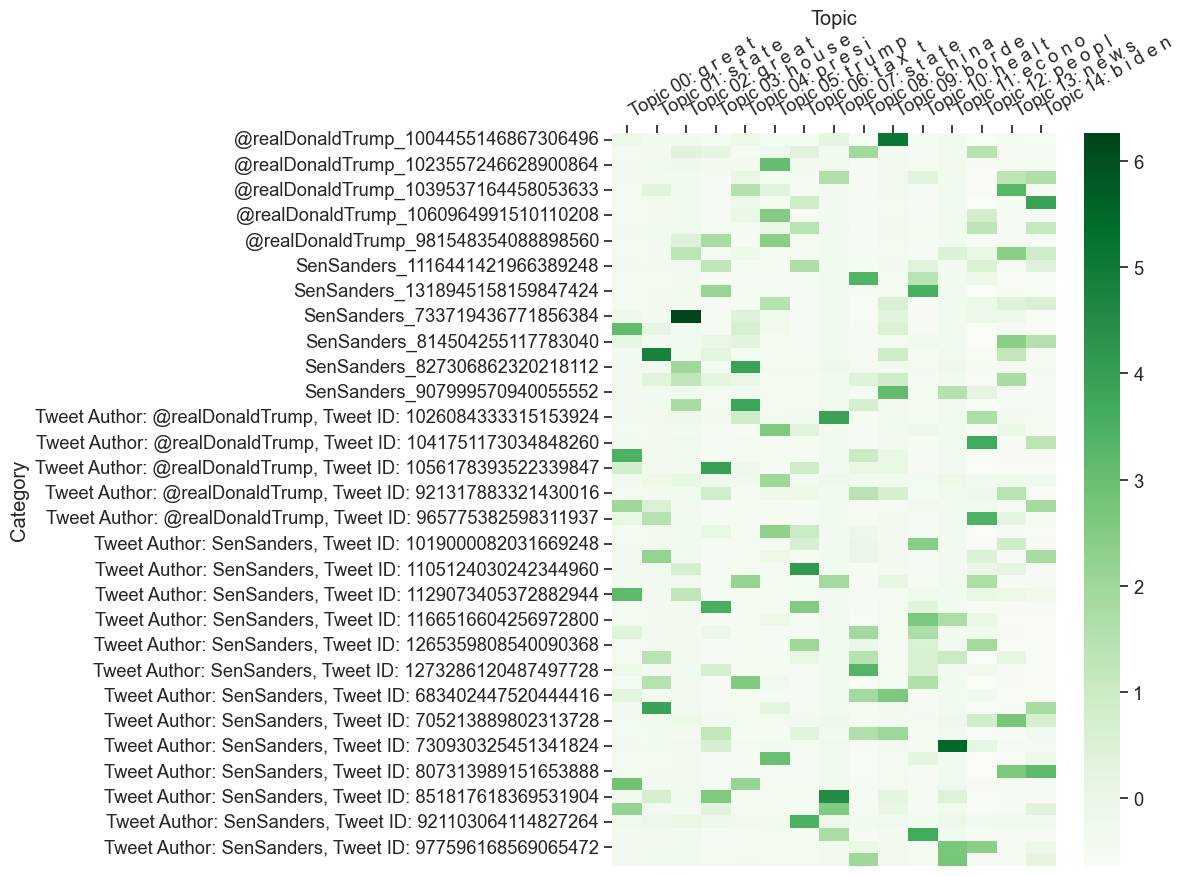

In [83]:
# Format by topics, probability of top words.

plot_categories_by_topics_heatmap(titles,
                                  topic_distributions,
                                  topics,
                                  target_labels=target_labels,
                                  color_map='Greens',
                                  dim=(12, 9))

### Q9. Interpret the heatmap
Do you see any pattern in the probability distributions of topics for each politician?

Are there topics that are more likely for one of the two politicians?

##### Q9 (words)

There are many interesting patterns that emerge within the probability distributions of topics for Sanders and Trump. From the heatmap and list of topics, we can see that Trump tends to weigh in heavily on controversy centered around America (border control, Biden, corrupt media), while Sanders weighs in on global topics (climate change, economy). The first few examples are:

✨Topic 0✨ "great thank american america today people day country nation law"
- This topic, general positivity and gratitude for American people, was split betweeen Sanders and Trump with a slight leaning towards Sanders.

✨Topic 1✨ "states united change world climate war energy iran must trump"
- This topic, concerning climate change, was dominated by Sanders.

✨Topic 2✨ "great thank big vote state win maga america get night"
- This topic was surprisingly led by Sanders even with the presence of 'maga'. With added context we can assume he was critical of Trump's campaign.

#### Other notable topics:

✨Topic 9✨ "border great strong military crime total endorsement democrats wall complete"
- This topic was led by Trump, its theme centered around a strong military and border control.

### X2. Optional question 2
(This question is not compulsory, it only allows you to get an extra point)

Make the sample balanced, with 50 tweets by Trump and 50 by Sanders.

In [81]:
# X2 (code)


### X3. Optional question 3
(This question is not compulsory, it only allows you to get an extra point)

Extend the analysis to all the tweets in the dataset.

In [82]:
# X3 (code and words)
# Tip: plotting a heatmap for thousands of tweets is not practical.
# Make a comparison based on the numerical values in the `df_norm_col` dataframe (see Week 6 notebook)